In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

___
## Reading data

In [84]:
df = pd.read_csv("./APY.csv")

___
## Printing data frame head

In [85]:
print(df.head())

                        State District       Crop  Crop_Year       Season  \
0  Andaman and Nicobar Island  NICOBARS  Arecanut       2007  Kharif        
1  Andaman and Nicobar Island  NICOBARS  Arecanut       2007  Rabi          
2  Andaman and Nicobar Island  NICOBARS  Arecanut       2008  Autumn        
3  Andaman and Nicobar Island  NICOBARS  Arecanut       2008  Summer        
4  Andaman and Nicobar Island  NICOBARS  Arecanut       2009  Autumn        

    Area   Production  Yield  
0  2439.6      3415.0   1.40  
1  1626.4      2277.0   1.40  
2  4147.0      3060.0   0.74  
3  4147.0      2660.0   0.64  
4  4153.0      3120.0   0.75  


___
## Printing data frame info

In [86]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345336 entries, 0 to 345335
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   State       345336 non-null  object 
 1   District    345336 non-null  object 
 2   Crop        345327 non-null  object 
 3   Crop_Year   345336 non-null  int64  
 4   Season      345336 non-null  object 
 5   Area        345336 non-null  float64
 6   Production  340388 non-null  float64
 7   Yield       345336 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 21.1+ MB
None


### Observation: 
- Data type for columns looks fine here.

___
## Print data frame's statistical data

In [87]:
print(df.describe(include='all'))

                State District     Crop      Crop_Year       Season  \
count          345336    345336  345327  345336.000000       345336   
unique             37       707      55            NaN            6   
top     Uttar Pradesh  BILASPUR    Rice            NaN  Kharif        
freq            44781      1244   21611            NaN       138369   
mean              NaN       NaN     NaN    2008.887512          NaN   
std               NaN       NaN     NaN       6.564361          NaN   
min               NaN       NaN     NaN    1997.000000          NaN   
25%               NaN       NaN     NaN    2003.000000          NaN   
50%               NaN       NaN     NaN    2009.000000          NaN   
75%               NaN       NaN     NaN    2015.000000          NaN   
max               NaN       NaN     NaN    2020.000000          NaN   

               Area     Production          Yield  
count   3.453360e+05  3.403880e+05  345336.000000  
unique           NaN           NaN         

___
## Print null value count and percentage for all columns in data frame

In [88]:
print(pd.DataFrame([df.isnull().sum(), df.isnull().sum() / df.shape[0] * 100]))

   State  District       Crop  Crop_Year  Season  Area    Production  Yield
0    0.0        0.0  9.000000        0.0     0.0    0.0  4948.000000    0.0
1    0.0        0.0  0.002606        0.0     0.0    0.0     1.432807    0.0


### Observation: 
- Crop column has 9 instances of null values which is 0.0026% of all, which can be dropped
- Production column has 4948 instances of null values which makes 1.43% of all, we can either drop these as well or substitute null values with mean of production

## Dropping rows where "Crop" column is null

In [89]:
df.dropna(subset="Crop", inplace=True)

## Replacing null values of "Production" column with mean value

In [90]:
df["Production"].fillna(df["Production"].mean(), inplace=True)

## Print null count again to check if null values have been removed and replaced

In [91]:
print(pd.DataFrame([df.isnull().sum(), df.isnull().sum() / df.shape[0] * 100]))

   State  District   Crop  Crop_Year  Season  Area   Production  Yield
0    0.0        0.0   0.0        0.0     0.0    0.0         0.0    0.0
1    0.0        0.0   0.0        0.0     0.0    0.0         0.0    0.0


### Observations:
- Data looks good

___
## Data Visualization

### Crop Production By Year

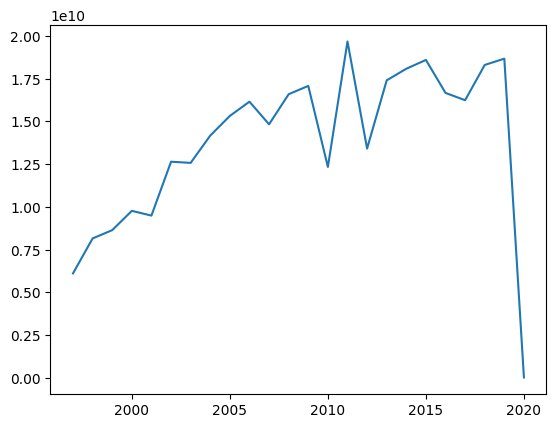

In [98]:
crops_by_year = df.groupby(["Crop_Year"])
total_productions = crops_by_year["Production"].sum()
plt.plot(total_productions)
plt.show()

### Production By Year

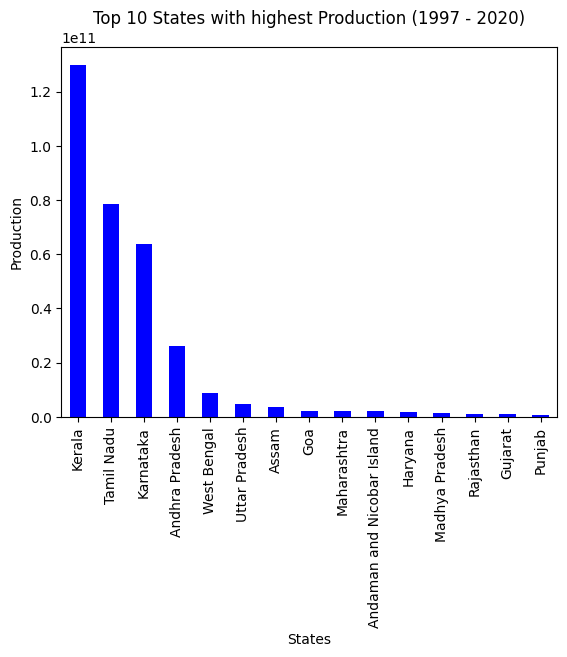

In [110]:
production_by_state = df.groupby('State')['Production'].sum()
production_by_state = production_by_state.sort_values(ascending=False)
production_by_state[0:15].plot(kind='bar',color='blue')
plt.title('Top 15 States with highest Production (1997 - 2020)')
plt.xlabel('States')
plt.ylabel('Production')
plt.show()

### Yield Per State

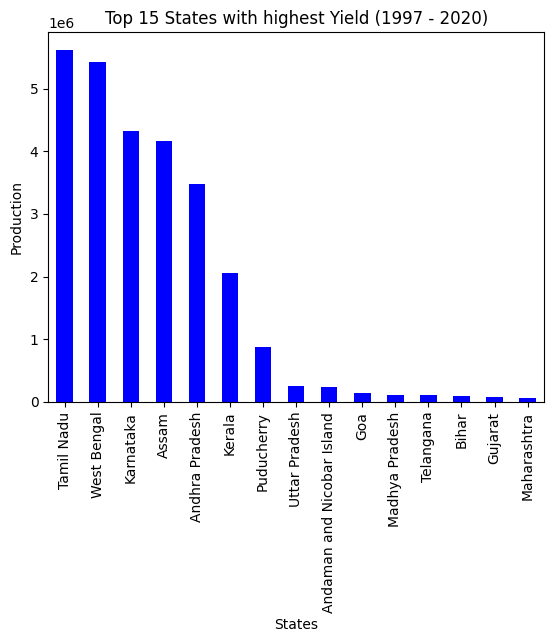

In [111]:
yield_by_state = df.groupby('State')['Yield'].sum()
yield_by_state = yield_by_state.sort_values(ascending=False)
yield_by_state[0:15].plot(kind='bar',color='blue')
plt.title('Top 15 States with highest Yield (1997 - 2020)')
plt.xlabel('States')
plt.ylabel('Production')
plt.show()

### Area Covered By Crop

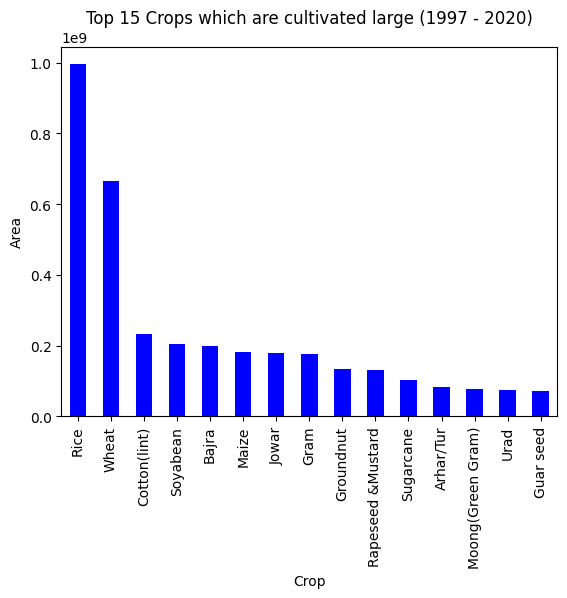

In [112]:
area_by_crop = df.groupby('Crop')['Area '].sum()
area_by_crop = area_by_crop.sort_values(ascending=False)
area_by_crop[0:15].plot(kind='bar',color='blue')
plt.title('Top 15 Crops which are cultivated large (1997 - 2020)')
plt.xlabel('Crop')
plt.ylabel('Area')
plt.show()